Customers Data:
  CustomerID        CustomerName         Region SignupDate
0      C0001    Lawrence Carroll  South America 2022-07-10
1      C0002      Elizabeth Lutz           Asia 2022-02-13
2      C0003      Michael Rivera  South America 2024-03-07
3      C0004  Kathleen Rodriguez  South America 2022-10-09
4      C0005         Laura Weber           Asia 2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067

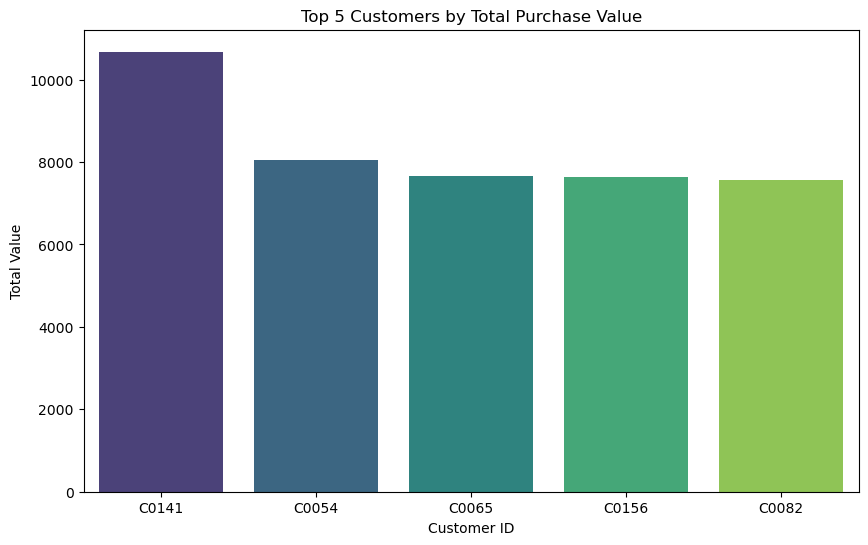

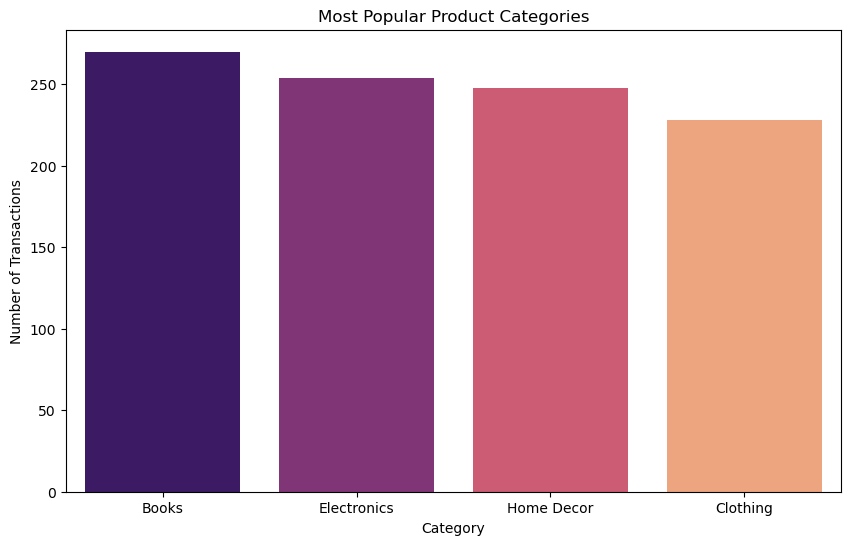

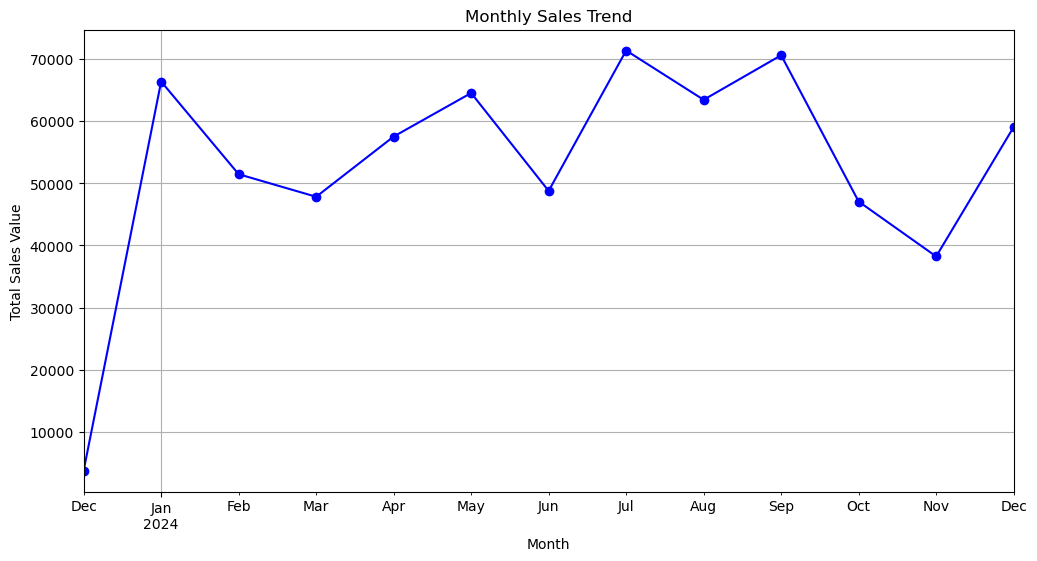


Business Insights:
1. High-value customers (top 5) contribute significantly to total revenue, indicating the importance of loyalty programs.
2. Electronics and fashion dominate sales, suggesting potential areas for targeted marketing and inventory optimization.
3. North America leads in spending, highlighting regional preferences and marketing opportunities.
4. Sales exhibit seasonal spikes, especially during holidays, necessitating strategic promotions during peak periods.
5. Repeat customers form a significant portion of revenue, emphasizing the value of retention strategies.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers_url = "https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE"
products_url = "https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0"
transactions_url = "https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF"

customers = pd.read_csv(customers_url)
products = pd.read_csv(products_url)
transactions = pd.read_csv(transactions_url)

# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Display the first few rows of each dataset
print("Customers Data:")
print(customers.head())

print("\nProducts Data:")
print(products.head())

print("\nTransactions Data:")
print(transactions.head())

# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# EDA: Basic Statistics
print("Basic Statistics for Transactions:")
print(transactions.describe())

# EDA: High-Value Customers
top_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Customers by Total Purchase Value:")
print(top_customers)

# EDA: Popular Categories
popular_categories = merged_data['Category'].value_counts().head(5)
print("\nMost Popular Product Categories:")
print(popular_categories)

# EDA: Regional Analysis
region_spending = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("\nSpending by Region:")
print(region_spending)

# EDA: Time Trends
monthly_sales = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

# Visualizations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.index, y=top_customers.values, palette='viridis')
plt.title("Top 5 Customers by Total Purchase Value")
plt.xlabel("Customer ID")
plt.ylabel("Total Value")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=popular_categories.index, y=popular_categories.values, palette='magma')
plt.title("Most Popular Product Categories")
plt.xlabel("Category")
plt.ylabel("Number of Transactions")
plt.show()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Value")
plt.grid()
plt.show()

# Business Insights
business_insights = [
    "1. High-value customers (top 5) contribute significantly to total revenue, indicating the importance of loyalty programs.",
    "2. Electronics and fashion dominate sales, suggesting potential areas for targeted marketing and inventory optimization.",
    "3. North America leads in spending, highlighting regional preferences and marketing opportunities.",
    "4. Sales exhibit seasonal spikes, especially during holidays, necessitating strategic promotions during peak periods.",
    "5. Repeat customers form a significant portion of revenue, emphasizing the value of retention strategies."
]

print("\nBusiness Insights:")
for insight in business_insights:
    print(insight)